In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
import pandas as pd
import re
import sys
import os
import matplotlib.pyplot as plt

In [2]:
columns=['author','title','body']
Literaries = pd.DataFrame(columns=columns)

In [3]:
author_index = 2
lit_index = 0

authors = os.listdir('./data/')
files = os.listdir('./data/' + authors[author_index])
directory = './data/' + authors[author_index] + '/'
print files
title = files[lit_index]
text = pd.read_table(directory+title, encoding="SHIFT-JIS", header=None)
title = text.iloc[0][0]
author = text.iloc[1][0]
print title, author
text

['fugaku_hyakkei.txt', 'hashire_merosu.txt', 'ningen_shikkaku.txt', 'otogi_zoshi.txt', 'shayo.txt', 'tsugaru.txt', 'viyon.txt']
富嶽百景 太宰治


,0
0,富嶽百景
1,太宰治
2,----------------------------------------------...
3,【テキスト中に現れる記号について】
4,《》：ルビ
5,（例）広重《ひろしげ》の富士
6,｜：ルビの付く文字列の始まりを特定する記号
7,（例）海抜千三百｜米《メエトル》
8,［＃］：入力者注 主に外字の説明や、傍点の位置の指定
9,（例）［＃地付き］（昭和十四年二月―三月）


In [4]:
body = text[10:242]
body = body.reset_index(drop=True)
body

,0
0,----------------------------------------------...
1,富士の頂角、広重《ひろしげ》の富士は八十五度、文晁《ぶんてう》の富士も八十四度くらゐ、けれ...
2,十国峠から見た富士だけは、高かつた。あれは、よかつた。はじめ、雲のために、いただきが見えず...
3,東京の、アパートの窓から見る富士は、くるしい。冬には、はつきり、よく見える。小さい、真白い...
4,昭和十三年の初秋、思ひをあらたにする覚悟で、私は、かばんひとつさげて旅に出た。
5,甲州。ここの山々の特徴は、山々の起伏の線の、へんに虚《むな》しい、なだらかさに在る。小島烏...
6,御坂峠、海抜千三百｜米《メエトル》。この峠の頂上に、天下茶屋といふ、小さい茶店があつて、井...
7,井伏氏は、仕事をして居られた。私は、井伏氏のゆるしを得て、当分その茶屋に落ちつくことになつ...
8,私が、その峠の茶屋へ来て二、三日経つて、井伏氏の仕事も一段落ついて、或る晴れた午後、私たち...
9,その翌々日であつたらうか、井伏氏は、御坂峠を引きあげることになつて、私も甲府までおともした...


In [5]:
litDF = pd.DataFrame([author,title,body])
litDF = litDF.T
litDF.columns = columns
litDF

,author,title,body
0,太宰治,富嶽百景,...


In [6]:
Literaries = Literaries.append(litDF)
Literaries

,author,title,body
0,太宰治,富嶽百景,...


In [7]:
#Literaries.to_pickle('literaries.pickle')
Literaries = pd.read_pickle('literaries.pickle')
Literaries

,author,title,body
0,夏目漱石,草枕,...
0,夏目漱石,坊っちゃん,...
0,夏目漱石,こころ,...
0,夏目漱石,門,...
0,夏目漱石,三四郎,...
0,夏目漱石,それから,...
0,夏目漱石,吾輩は猫である,...
0,宮沢賢治,注文の多い料理店,...
0,宮沢賢治,どんぐりと山猫,...
0,宮沢賢治,銀河鉄道の夜,...


In [8]:
p = Literaries[Literaries['author']==u'宮沢賢治']
index = 4
print p.iloc[index]['author'],p.iloc[index]['title']
print 
body = p.iloc[index]['body']
#pattern = u'[ぁ-ん]+'
pattern = ur'[ァ-ヶー]+'
#pattern = u'[一-龥]+'
r=re.compile(pattern)

c_list = []
for idx, paragraph in body.iterrows():
    paragraph_wo_ruby = r.findall(paragraph[0])
    for p in paragraph_wo_ruby:
        c_list.append(p)
for c in set(c_list):
    print c

宮沢賢治 風野又三郎

キョロキョロ
サイクルホール
ベスター
ハンケチ
レコード
ヶ
パチパチ
アアハハハ
ヘルマン
ガラスマント
レーンコート
ピル
フゥ
コップ
ベーリング
マーク
パリパリパリパリ
ラケット
タスカロラ
ホッホウ
テッデーベーヤ
テニス
ギラッ
チーフメート
アルプス
マント
ドンブラゴッコ
シガア
ゲーキー
ホラ
ガラス
ドッドドドドウドドドウドドドウ
カチッ
パン
トンネル
ガヤガヤ
カンカン
ベェスター
チッチクチッチク
キラッ
テニスコート
スタート
グリーンランド
ドッドド
アーキバルド
メートル
ドドウ
ツイツイ
シャツ
ハンドル
キラキラ
ゲーキイ
ピゥ
ジャンク
サーヴ
シャンハイ
ボール
ギルバート
ポーッ
ドッドドドドウドドドードドドウ
ピーッ
ル
オーロラ
アラスカ
ドドウド
フィウ
ハワイ
ボックシング
ホウ
ロシヤ
ギラギラ
ピクッ
シベリヤ
バラリバラリ
シャッポ
ボルネオ
サア


In [9]:
from pyknp import Jumanpp
jumanpp = Jumanpp()

index=1
p = Literaries[Literaries['author']==u'宮沢賢治']
body = p.iloc[index]['body']
paragraph = body.iloc[0][0]
paragraph_wo_ruby = re.sub(u'《.+?》', "", paragraph)
print paragraph_wo_ruby

columns=['見出し','読み','原形','品詞','品詞細分類','活用型','活用形','意味情報','代表表記']
df = pd.DataFrame(columns=columns)
print df
result = jumanpp.analysis(paragraph_wo_ruby)
for mrph in result.mrph_list():
    df = df.append(pd.DataFrame([[
        mrph.midasi,
        mrph.yomi,
        mrph.genkei,
        mrph.hinsi,
        mrph.bunrui,
        mrph.katuyou1,
        mrph.katuyou2,
        mrph.imis,
        mrph.repname
    ]], columns=columns))
#df = df.T
#df.columns = columns
df

　おかしなはがきが、ある土曜日の夕がた、一郎のうちにきました。
Empty DataFrame
Columns: [見出し, 読み, 原形, 品詞, 品詞細分類, 活用型, 活用形, 意味情報, 代表表記]
Index: []


,見出し,読み,原形,品詞,品詞細分類,活用型,活用形,意味情報,代表表記
0,,,,特殊,空白,*,*,NIL,
0,おかしな,おかしな,おかしな,連体詞,*,*,*,代表表記:おかしな/おかしな,おかしな/おかしな
0,はがき,はがき,はがき,名詞,普通名詞,*,*,代表表記:葉書き/はがき カテゴリ:人工物-その他 ドメイン:家庭・暮らし,葉書き/はがき
0,が,が,が,助詞,格助詞,*,*,NIL,
0,、,、,、,特殊,読点,*,*,NIL,
0,ある,ある,ある,連体詞,*,*,*,代表表記:或る/ある,或る/ある
0,土曜日,どようび,土曜日,名詞,時相名詞,*,*,代表表記:土曜日/どようび カテゴリ:時間,土曜日/どようび
0,の,の,の,助詞,接続助詞,*,*,NIL,
0,夕,ゆう,夕,名詞,時相名詞,*,*,代表表記:夕/ゆう 漢字読み:訓 カテゴリ:時間,夕/ゆう
0,がた,がた,がた,接尾辞,名詞性名詞接尾辞,*,*,代表表記:方/がた,方/がた


In [10]:
print df['品詞'].iloc[0]

特殊


In [11]:
index=1
p = Literaries[Literaries['author']==u'宮沢賢治']
body = p.iloc[index]['body']
paragraph = body.iloc[0][0]
paragraph_wo_ruby = re.sub(u'《.+?》', "", paragraph)
print paragraph_wo_ruby

from janome.tokenizer import Tokenizer
t = Tokenizer()
for token in t.tokenize(paragraph_wo_ruby):
    print(token)

　おかしなはがきが、ある土曜日の夕がた、一郎のうちにきました。
おかしな	連体詞,*,*,*,*,*,おかしな,オカシナ,オカシナ
はがき	名詞,一般,*,*,*,*,はがき,ハガキ,ハガキ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
、	記号,読点,*,*,*,*,、,、,、
ある	連体詞,*,*,*,*,*,ある,アル,アル
土曜日	名詞,副詞可能,*,*,*,*,土曜日,ドヨウビ,ドヨービ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
夕	名詞,副詞可能,*,*,*,*,夕,ユウ,ユー
がた	名詞,一般,*,*,*,*,がた,ガタ,ガタ
、	記号,読点,*,*,*,*,、,、,、
一郎	名詞,固有名詞,人名,名,*,*,一郎,イチロウ,イチロー
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
き	動詞,自立,*,*,カ変・クル,連用形,くる,キ,キ
まし	助動詞,*,*,*,特殊・マス,連用形,ます,マシ,マシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。


In [12]:
def extractCharacter(body, c_type):
    if c_type=='hiragana':
        pattern = u'[ぁ-ん]'
    elif c_type=='katakana':
        pattern = ur'[ァ-ヶー]'
    elif c_type=='kanji':
        pattern = u'[一-龥]'
    r = re.compile(pattern)
    c_list = []
    for idx, paragraph in body.iterrows():
        paragraph_wo_ruby = re.sub(u'《.+?》', "", paragraph[0])
        paragraph_wo_ruby_and_bou = re.sub(u'［＃.+?］', "", paragraph_wo_ruby)
        characters = r.findall(paragraph_wo_ruby_and_bou)
        for c in characters:
            c_list.append(c)
    return c_list

In [13]:
columns = [u'著者',u'題名',u'ひらがな',u'カタカナ',u'漢字']
characters = pd.DataFrame(columns=columns)
for idx, p in Literaries.iterrows():
    body = p['body']
    hiragana_list =extractCharacter(body, 'hiragana')
    katakana_list =extractCharacter(body, 'katakana')
    kanji_list =extractCharacter(body, 'kanji')
    print p['author'],p['title']
    print 'ひらがな ',len(hiragana_list), '個'
    print 'カタカナ ',len(katakana_list), '個'
    print '漢字 ',len(kanji_list), '個'
    print
    characters = characters.append(pd.DataFrame([[p['author'],p['title'],len(hiragana_list),len(katakana_list),len(kanji_list)]],columns=columns))
    characters = characters.reset_index(drop=True)

夏目漱石 草枕
ひらがな  50359 個
カタカナ  431 個
漢字  25213 個

夏目漱石 坊っちゃん
ひらがな  55976 個
カタカナ  1090 個
漢字  24906 個

夏目漱石 こころ
ひらがな  105218 個
カタカナ  181 個
漢字  44438 個

夏目漱石 門
ひらがな  84398 個
カタカナ  212 個
漢字  44591 個

夏目漱石 三四郎
ひらがな  108622 個
カタカナ  1552 個
漢字  44333 個

夏目漱石 それから
ひらがな  90984 個
カタカナ  435 個
漢字  63709 個

夏目漱石 吾輩は猫である
ひらがな  194086 個
カタカナ  3456 個
漢字  98093 個

宮沢賢治 注文の多い料理店
ひらがな  3754 個
カタカナ  109 個
漢字  899 個

宮沢賢治 どんぐりと山猫
ひらがな  4797 個
カタカナ  15 個
漢字  791 個

宮沢賢治 銀河鉄道の夜
ひらがな  30582 個
カタカナ  2325 個
漢字  6684 個

宮沢賢治 グスコーブドリの伝記
ひらがな  17628 個
カタカナ  1201 個
漢字  4458 個

宮沢賢治 風野又三郎
ひらがな  22133 個
カタカナ  726 個
漢字  6552 個

宮沢賢治 オツベルと象
ひらがな  3656 個
カタカナ  395 個
漢字  987 個

宮沢賢治 セロ弾きのゴーシュ
ひらがな  8714 個
カタカナ  669 個
漢字  1477 個

宮沢賢治 やまなし
ひらがな  1744 個
カタカナ  81 個
漢字  475 個

太宰治 富嶽百景
ひらがな  9229 個
カタカナ  220 個
漢字  3747 個

太宰治 走れメロス
ひらがな  5719 個
カタカナ  411 個
漢字  2502 個

太宰治 人間失格
ひらがな  44847 個
カタカナ  1912 個
漢字  18502 個

太宰治 お伽草紙
ひらがな  46052 個
カタカナ  1131 個
漢字  16265 個

太宰治 斜陽
ひらがな  58184 個
カタカナ  1855 個
漢字  19603 個

太宰治 津軽
ひらがな  66594

In [14]:
for idx,x in characters.iterrows():
    characters[u'漢字'][idx] = x[u'漢字'] / x[u'ひらがな']
    characters[u'カタカナ'][idx] = x[u'カタカナ'] / x[u'ひらがな']
    characters[u'ひらがな'][idx] = 1
characters

/home/ruho/anaconda2/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ruho/anaconda2/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ruho/anaconda2/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,著者,題名,ひらがな,カタカナ,漢字
0,夏目漱石,草枕,1.0,0.008559,0.500665
1,夏目漱石,坊っちゃん,1.0,0.019473,0.444941
2,夏目漱石,こころ,1.0,0.001720,0.422342
3,夏目漱石,門,1.0,0.002512,0.528342
4,夏目漱石,三四郎,1.0,0.014288,0.408140
5,夏目漱石,それから,1.0,0.004781,0.700222
6,夏目漱石,吾輩は猫である,1.0,0.017807,0.505410
7,宮沢賢治,注文の多い料理店,1.0,0.029036,0.239478
8,宮沢賢治,どんぐりと山猫,1.0,0.003127,0.164895
9,宮沢賢治,銀河鉄道の夜,1.0,0.076025,0.218560


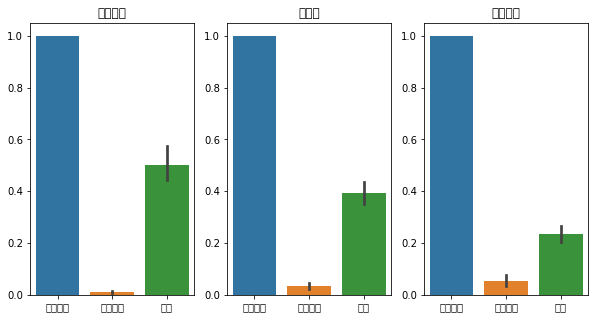

In [15]:
import seaborn as sns
plt.figure(figsize=(10,5))

author=u'夏目漱石'
plt.subplot(1,3,1)
sns.barplot(data=characters[characters[u'著者']==author])
plt.title(author)

author=u'太宰治'
plt.subplot(1,3,2)
sns.barplot(data=characters[characters[u'著者']==author])
plt.title(author)

author=u'宮沢賢治'
plt.subplot(1,3,3)
sns.barplot(data=characters[characters[u'著者']==author])
plt.title(author)

plt.savefig('chara.png')